##### **A Deep Learning Approach for Intrusion Detection Using Recurrent Neural Networks**

> Binary - Attack and Normal type 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.layers import SimpleRNN

In [3]:
## add the columns' name and read the KDDTrain and KDDTest datasets
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

print(col_names)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']


## Dataset
The dataset covers the **KDDTrain** dataset as the training set and **KDDTest** and **KDDTest−21** datasets as the testing set, normal records and four different types of attack records.

In [4]:

#Training set
df = pd.read_csv("Dataset/NSL_KDD_Train.csv",header=None, names = col_names)
# Testing set
df_test = pd.read_csv("Dataset/NSL_KDD_Test.csv", header=None, names = col_names)

print('Training: ',df.shape)
print('Testing: ',df_test.shape)

Training:  (125973, 42)
Testing:  (22544, 42)


In [5]:
df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    label  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  neptune  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [6]:
df_test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate    label  
0                      1.00  neptune  
1                      1.00  neptune  
2                      0.00   normal  
3                      0.00    saint  
4                      0.71    mscan  

[5 rows x 42 columns]

In [7]:
print("Target for training set:")
print(df['label'].value_counts())

Target for training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [8]:
print("Target for testing set:")
print(df_test['label'].value_counts())

Target for testing set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64


<AxesSubplot:>

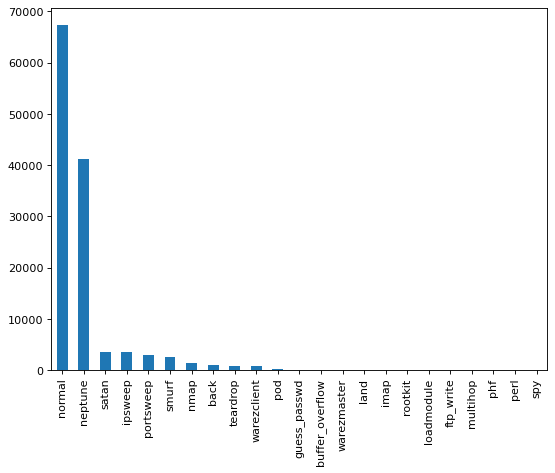

In [9]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df['label'].value_counts().plot(kind='bar')


# Step 1: Data Preprocessing

## Numericalization
There are 38 numeric features and 3 nonnumeric features in the NSL-KDD dataset. Because the input value of RNN-IDS should be a numeric matrix, we must convert some nonnumeric features, such as ‘**protocol_type**’, ‘**service**’ and ‘**flag**’ features, into numeric form.

In [10]:
print('Training set unique categories in column 2, 3 and 4:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("{col_name} : {unique_cat}".format(col_name=col_name, unique_cat=unique_cat))

Training set unique categories in column 2, 3 and 4:
protocol_type : 3
service : 70
flag : 11
label : 23


In [11]:
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [12]:
print('Distribution of categories in flag:')
print(df['flag'].value_counts().sort_values(ascending=False).head())

Distribution of categories in flag:
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64


In [13]:
print('Distribution of categories in label:')
print(df['label'].value_counts().sort_values(ascending=False).head())

Distribution of categories in label:
normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: label, dtype: int64


In [14]:
## Similarly for the test dataset
# Test set
print('Test set unique categories in column 2, 3 and 4:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("{col_name} : {unique_cat}".format(col_name=col_name, unique_cat=unique_cat))

Test set unique categories in column 2, 3 and 4:
protocol_type : 3
service : 64
flag : 11
label : 38


### Label Encoder : Converting the categorical values to numerica values

In [15]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
unique_protocol2=[x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
unique_service2=[x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
unique_flag2=[x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2



['icmp', 'tcp', 'udp']
['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


In [16]:
print(len(unique_protocol2))
print(len(unique_service2))
print(len(unique_flag2))

3
70
11


In [17]:
#do it for test set
#service
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[x for x in unique_service_test]

#protocol
unique_protocol_test=sorted(df_test.protocol_type.unique())
unique_protocol2_test=[x for x in unique_protocol_test]

#flag
unique_flag_test=sorted(df_test.flag.unique())
unique_flag2_test=[x for x in unique_flag_test]

testdumcols=unique_protocol2_test + unique_service2_test + unique_flag2_test

In [18]:
print(len(unique_protocol2_test))
print(len(unique_service2_test))
print(len(unique_flag2_test))

3
64
11


In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical = df[categorical_columns]
# for Test
testdf_categorical = df_test[categorical_columns]

df_categorical_enc=df_categorical.apply(LabelEncoder().fit_transform)

print(df_categorical.head())

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF


In [20]:
## after label encoding
print(df_categorical_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [21]:
# test set
testdf_categorical_enc=testdf_categorical.apply(LabelEncoder().fit_transform)
print(testdf_categorical_enc.head())

   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [22]:
print('Training: ',df_categorical_enc.shape)
print('Testing:',testdf_categorical_enc.shape)

Training:  (125973, 3)
Testing: (22544, 3)


### one-hot encoding
These numeric values are then encoded as binary vectors (1,0,0), (0,1,0) and (0,0,1) using one-hot encoding

In [23]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_enc)
df_onehot_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
df_onehot_data.head()

icmp  tcp  udp  IRC  X11  Z39_50  aol  auth  bgp  courier  ...  REJ  RSTO  \
0   0.0  1.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0  ...  0.0   0.0   
1   0.0  0.0  1.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0  ...  0.0   0.0   
2   0.0  1.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0  ...  0.0   0.0   
3   0.0  1.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0  ...  0.0   0.0   
4   0.0  1.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0  ...  0.0   0.0   

   RSTOS0  RSTR   S0   S1   S2   S3   SF   SH  
0     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2     0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 84 columns]

In [24]:
# test set
enc = OneHotEncoder(categories='auto')
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_enc)
testdf_onehot_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)
testdf_onehot_data.head()

icmp  tcp  udp  IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ...  REJ  \
0   0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0      0.0       0.0  ...  1.0   
1   0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0      0.0       0.0  ...  1.0   
2   0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0      0.0       0.0  ...  0.0   
3   1.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0      0.0       0.0  ...  0.0   
4   0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0      0.0       0.0  ...  0.0   

   RSTO  RSTOS0  RSTR   S0   S1   S2   S3   SF   SH  
0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2   0.0     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3   0.0     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4   1.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 78 columns]

In [25]:
# print('Training onehot df: ',df_onehot_data.shape)
print('Testing onehot df:',testdf_onehot_data.shape)

Testing onehot df: (22544, 78)


In [26]:
# Since the testdf had 6 columns less in the service, we add the missing values 
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
difference=[x for x in difference]

for col in difference:
    testdf_onehot_data[col] = 0

print(df_onehot_data.shape)    
print(testdf_onehot_data.shape)

(125973, 84)
(22544, 84)


- add this into original dataframe
- drop the columns
- add attack types
- onehot-encoding for attack types
- total 122 features
- build RNN model
- predict and accuracy

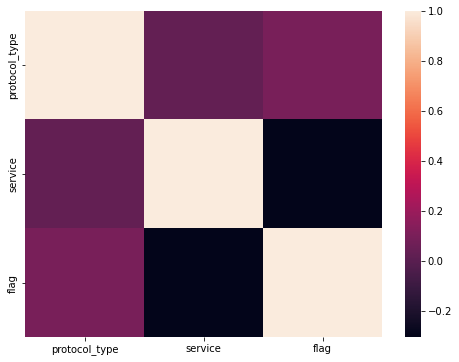

In [27]:
# df = df.dropna('columns')# drop columns with NaN

# df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
# test df correlation between values
corr = df_categorical_enc.corr()
plt.figure(figsize=(8,6))
sb.heatmap(corr)
plt.show()

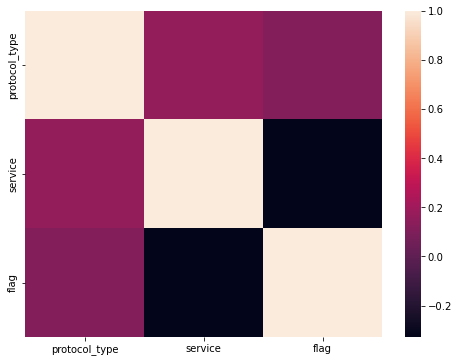

In [28]:
corr = testdf_categorical_enc.corr()
plt.figure(figsize=(8,6))
sb.heatmap(corr)
plt.show()

In [29]:
traindf=df.join(df_onehot_data)
traindf.drop('flag', axis=1, inplace=True)
traindf.drop('protocol_type', axis=1, inplace=True)
traindf.drop('service', axis=1, inplace=True)
print(traindf.shape)
traindf.head()

(125973, 123)


duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  REJ  RSTO  RSTOS0  \
0                  0          0                0  ...  0.0   0.0     0.0   
1                  0          0                0  ...  0.0   0.0     0.0   
2                  0          0                0  ...  0.0   0.0     0.0   
3                  0          1                0  ...  0.0   0.0     0.0   
4                  0          1                0  ...  0.0   0.0     0.0   

   RSTR   S0   S1   S2   S3   SF   SH  
0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2   0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4   0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 123 columns]

In [30]:
# test data
testdf=df_test.join(testdf_onehot_data)
testdf.drop('flag', axis=1, inplace=True)
testdf.drop('protocol_type', axis=1, inplace=True)
testdf.drop('service', axis=1, inplace=True)
print(testdf.shape)
testdf.head()

(22544, 123)


duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         2      12983          0     0               0       0    0   
3         0         20          0     0               0       0    0   
4         1          0         15     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...   S2   S3   SF   SH  \
0                  0          0                0  ...  0.0  0.0  0.0  0.0   
1                  0          0                0  ...  0.0  0.0  0.0  0.0   
2                  0          0                0  ...  0.0  0.0  1.0  0.0   
3                  0          0                0  ...  0.0  0.0  1.0  0.0   
4                  0          0                0  ...  0.0  0.0  0.0  0.0   

   harvest  http_2784  aol  http_8001  red_i  urh_i  
0        0          0    0          0      0      0  
1        0          0    0          0      0      0  
2        0          0    0          0      0      0  
3        0          0    0          0      0      0  
4        0          0    0          0      0      0  

[5 rows x 123 columns]

# Step 2: Normalization

### 1. Feature Scaling
First, according to some features, suchas ‘duration[0,58329]’, ‘src_bytes[0,1.3 × 109]’ and ‘dst_bytes[0,1.3 × 109]’, where the difference between the maximum and minimum values has a very large scope, we apply the logarithmic scaling method for scaling to obtain the ranges of ‘duration[0,4.77]’, ‘src_bytes[0,9.11]’ and ‘dst_bytes[0,9.11]’

In [31]:
log2_duration = []
for i in traindf['duration']:
  if(i==0):
    log2_duration.append(0)
  else:
    log2_duration.append(np.log2(i))

print(log2_duration)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12.453013354466314, 0, 8.985841937003341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 1.0, 13.144020869266893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.29920801838728, 0, 0, 0, 0, 0, 1.0, 0, 0, 10.079484783826816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14.663446918132605, 0, 0, 0, 0, 0, 0, 0, 7.906890595608519, 0, 0, 0, 0.0, 0, 4.700439718141092, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13.138111776319704, 2.807354922057604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 13.887886965339108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 4.321928094887363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.169925001442312, 0, 13.1728962458

In [32]:
log2_src_bytes = []
for i in traindf['src_bytes']:
  if(i==0):
    log2_src_bytes.append(0)
  else:
    log2_src_bytes.append(np.log2(i))

print(log2_src_bytes)

[8.939579214314692, 7.189824558880018, 0, 7.857980995127572, 7.636624620543649, 0, 0, 0, 0, 0, 0, 0, 8.164906926675688, 8.383704292474052, 0, 0, 8.228818690495881, 4.169925001442312, 7.864186144654281, 8.422064766172813, 0, 0, 7.98299357469431, 7.199672344836364, 0, 8.7714894695006, 0, 7.826548487290915, 7.7481928495894605, 7.912889336229962, 3.0, 0, 8.243173983472952, 0, 5.491853096329675, 6.714245517666122, 5.426264754702098, 0, 8.339850002884624, 0, 0, 0, 10.635718120331047, 7.189824558880018, 8.179909090014934, 0, 4.807354922057604, 7.994353436858858, 8.383704292474052, 0, 8.238404739325079, 0, 4.807354922057604, 7.78135971352466, 5.426264754702098, 5.459431618637297, 3.0, 0, 0, 5.426264754702098, 9.324180546618742, 0, 0, 8.276124405274238, 0, 9.442943495848729, 0, 0, 0, 0, 7.787902559391432, 0, 7.499845887083206, 5.392317422778761, 0, 3.584962500721156, 0, 7.714245517666122, 8.326429487122303, 0, 8.361943773735241, 0, 0, 3.0, 8.321928094887362, 0, 7.813781191217037, 0, 0, 7.189824

In [33]:
log2_dst_bytes = []
for i in traindf['dst_bytes']:
  if(i==0):
    log2_dst_bytes.append(0)
  else:
    log2_dst_bytes.append(np.log2(i))

print(log2_dst_bytes)

[0, 0, 0, 12.993115299679177, 8.714245517666123, 0, 0, 0, 0, 0, 0, 0, 11.136350341454156, 0, 0, 0, 13.75112558336727, 0, 9.266786540694902, 10.20212382383046, 0, 0, 13.539280000157696, 6.714245517666122, 0, 13.815883588859052, 0, 12.685624839726355, 13.357964301369893, 10.451211111832329, 0, 0, 9.116343961237469, 0, 5.491853096329675, 7.199672344836364, 5.426264754702098, 0, 11.16867211813223, 0, 0, 0, 8.539158811108031, 6.714245517666122, 11.553629293916364, 0, 0, 9.749869427396844, 0, 0, 8.960001932068081, 0, 0, 10.449148645375436, 6.108524456778169, 7.05528243550119, 0, 0, 0, 5.426264754702098, 0, 0, 0, 11.448116305409464, 0, 8.379378367071261, 0, 0, 0, 0, 11.490850876740298, 0, 0, 5.392317422778761, 0, 0, 0, 11.44604940671655, 12.472437000051329, 0, 11.959277505720502, 0, 0, 0, 8.566054038171092, 0, 11.877284133523196, 0, 0, 6.714245517666122, 10.467605550082997, 10.53430288245463, 5.459431618637297, 0, 0, 8.370687406807217, 6.672425341971495, 9.550746785383243, 6.714245517666122, 

In [34]:
# step1: apply the logarithmic scaling method for scaling to obtain the ranges of `duration[0,4.77]', `src_bytes[0,9.11]' and `dst_bytes[0,9.11]
traindf['log2_duration'] = log2_duration
traindf['log2_src_bytes'] = log2_src_bytes
traindf['log2_dst_bytes'] = log2_dst_bytes

traindf=traindf.drop(['duration','src_bytes','dst_bytes'], axis=1)
print(traindf.shape)
print(traindf)

(125973, 123)
        land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0          0               0       0    0                  0          0   
1          0               0       0    0                  0          0   
2          0               0       0    0                  0          0   
3          0               0       0    0                  0          1   
4          0               0       0    0                  0          1   
...      ...             ...     ...  ...                ...        ...   
125968     0               0       0    0                  0          0   
125969     0               0       0    0                  0          0   
125970     0               0       0    0                  0          1   
125971     0               0       0    0                  0          0   
125972     0               0       0    0                  0          1   

        num_compromised  root_shell  su_attempted  num_root  ...  RSTR   S0  \
0     

In [35]:
# similarly for the testdf
log2_duration_test = []
for i in testdf['duration']:
  if(i==0):
    log2_duration_test.append(0)
  else:
    log2_duration_test.append(np.log2(i))

print(log2_duration_test)

[0, 0, 1.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.20945336562895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9.65284497300198, 0, 0, 0, 0, 0, 0, 3.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.139551352398794, 0, 0, 0, 12.858758099935422, 0, 2.0, 8.129283016944967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12.982280604558284, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.584962500721156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 4.954196310386875, 0, 0, 0, 0, 0, 12.980139577639157, 12.987974524296153, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12.883025068440173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.02167404285837, 0, 0, 0, 0, 12.86611979330307, 0, 0, 0, 0.0, 0, 0, 12.995943767764953, 0, 0, 0, 0, 0, 0, 0, 8.139551352398794, 0, 0, 8.134426320220927, 0, 0, 12.877667574067882, 0, 0, 0, 11.02167404285837, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 2.0, 0, 0, 0, 0, 0, 12.874597192401634, 0, 0, 0, 0, 4.754887502163468, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.014717929860009, 0, 0,

In [36]:
log2__src_bytes_test = []
for i in testdf['src_bytes']:
  if(i==0):
    log2__src_bytes_test.append(0)
  else:
    log2__src_bytes_test.append(np.log2(i))

print(log2__src_bytes_test)

[0, 0, 13.664336166972465, 4.321928094887363, 0, 8.060695931687555, 9.997179480937621, 7.011227255423254, 8.353146825498083, 4.700439718141092, 0, 9.266786540694902, 0, 0, 9.594324603924848, 8.451211111832329, 7.734709620225838, 7.94251450533924, 5.491853096329675, 0, 0, 0, 7.614709844115208, 8.113742166049189, 0, 0, 8.199672344836364, 8.228818690495881, 9.022367813028454, 5.754887502163468, 16.231521210875705, 9.491853096329674, 8.233619676759702, 0.0, 0, 0, 7.7073591320808825, 7.78135971352466, 5.426264754702098, 16.43146495782059, 0, 8.113742166049189, 8.326429487122303, 8.388017285345136, 0, 7.870364719583405, 0, 15.735027079802625, 0, 5.523561956057013, 8.312882955284355, 8.0, 0, 0, 7.321928094887363, 7.839203788096944, 0, 6.714245517666122, 0, 8.139551352398794, 4.807354922057604, 18.11358957149472, 7.864186144654281, 8.005624549193879, 0, 7.741466986401147, 0, 0, 0, 7.6653359171851765, 0, 0, 8.262094845370179, 8.321928094887362, 0, 7.7481928495894605, 8.483815777264256, 0, 8.076

In [37]:
log2_dst_bytes_test = []
for i in testdf['dst_bytes']:
  if(i==0):
    log2_dst_bytes_test.append(0)
  else:
    log2_dst_bytes_test.append(np.log2(i))

print(log2_dst_bytes_test)

[0, 0, 0, 0, 3.9068905956085187, 13.825256951514024, 8.59618975614441, 7.442943495848728, 8.867278739709661, 7.294620748891627, 0, 8.366322214245816, 0, 0, 18.474371396751565, 11.817783121774534, 9.364134655008051, 11.029287226968245, 5.459431618637297, 0, 0, 0, 10.832098846039134, 10.826548487290914, 0, 0, 12.653292945382814, 8.78135971352466, 0, 5.672425341971495, 0.0, 8.134426320220927, 14.272775563286087, 0.0, 0, 5.459431618637297, 13.65441226814894, 9.426264754702098, 6.149747119504682, 0, 0, 12.278449458220482, 11.406736482691723, 11.656424863277781, 0, 11.659995892429977, 0, 13.021327032624372, 0, 5.491853096329675, 8.930737337562887, 12.266200912498961, 0, 0, 9.226412192788786, 8.991521846075695, 0, 7.189824558880018, 5.459431618637297, 8.62935662007961, 6.539158811108031, 0, 11.128638812852598, 13.088788238716907, 0, 9.333155350310616, 0, 0, 0, 9.346513733165635, 0, 6.3750394313469245, 8.918863237274595, 10.703038388986418, 0, 8.74819284958946, 11.84979602224561, 3.90689059560

Problem: divide by zero encountered in log2, getting -inf values

In [38]:
# step1: apply the logarithmic scaling method for scaling to obtain the ranges of `duration[0,4.77]', `src_bytes[0,9.11]' and `dst_bytes[0,9.11]
testdf['log2_duration'] = log2_duration_test
testdf['log2_src_bytes'] = log2__src_bytes_test
testdf['log2_dst_bytes'] = log2_dst_bytes_test

testdf=testdf.drop(['duration','src_bytes','dst_bytes'], axis=1)
print(testdf.shape)
print(testdf)

(22544, 123)
       land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0         0               0       0    0                  0          0   
1         0               0       0    0                  0          0   
2         0               0       0    0                  0          0   
3         0               0       0    0                  0          0   
4         0               0       0    0                  0          0   
...     ...             ...     ...  ...                ...        ...   
22539     0               0       0    0                  0          1   
22540     0               0       0    0                  0          1   
22541     0               0       0    2                  0          1   
22542     0               0       0    0                  0          0   
22543     0               0       0    0                  0          0   

       num_compromised  root_shell  su_attempted  num_root  ...   SH  harvest  \
0                

In [39]:
traindf.head()

land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0     0               0       0    0                  0          0   
1     0               0       0    0                  0          0   
2     0               0       0    0                  0          0   
3     0               0       0    0                  0          1   
4     0               0       0    0                  0          1   

   num_compromised  root_shell  su_attempted  num_root  ...  RSTR   S0   S1  \
0                0           0             0         0  ...   0.0  0.0  0.0   
1                0           0             0         0  ...   0.0  0.0  0.0   
2                0           0             0         0  ...   0.0  1.0  0.0   
3                0           0             0         0  ...   0.0  0.0  0.0   
4                0           0             0         0  ...   0.0  0.0  0.0   

    S2   S3   SF   SH  log2_duration  log2_src_bytes  log2_dst_bytes  
0  0.0  0.0  1.0  0.0            0.0        8.939579        0.000000  
1  0.0  0.0  1.0  0.0            0.0        7.189825        0.000000  
2  0.0  0.0  0.0  0.0            0.0        0.000000        0.000000  
3  0.0  0.0  1.0  0.0            0.0        7.857981       12.993115  
4  0.0  0.0  1.0  0.0            0.0        7.636625        8.714246  

[5 rows x 123 columns]

In [40]:
testdf.head()

land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0     0               0       0    0                  0          0   
1     0               0       0    0                  0          0   
2     0               0       0    0                  0          0   
3     0               0       0    0                  0          0   
4     0               0       0    0                  0          0   

   num_compromised  root_shell  su_attempted  num_root  ...   SH  harvest  \
0                0           0             0         0  ...  0.0        0   
1                0           0             0         0  ...  0.0        0   
2                0           0             0         0  ...  0.0        0   
3                0           0             0         0  ...  0.0        0   
4                0           0             0         0  ...  0.0        0   

   http_2784  aol  http_8001  red_i  urh_i  log2_duration  log2_src_bytes  \
0          0    0          0      0      0            0.0        0.000000   
1          0    0          0      0      0            0.0        0.000000   
2          0    0          0      0      0            1.0       13.664336   
3          0    0          0      0      0            0.0        4.321928   
4          0    0          0      0      0            0.0        0.000000   

   log2_dst_bytes  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        3.906891  

[5 rows x 123 columns]

### Min-max normalization
The value of every feature is mapped to the [0,1] range
linearly, where Max denotes the maximum
value and Min denotes minimum value for each feature

The dataset was divided into separate datasets for each attack category. Attack tags have been renamed for each. 
- 0 = Normal
- 1 = DoS 
- 2 = Probe 
- 3 = R2L
- 4 = U2R

In the new datasets, the tag column has been replaced with the new values.

In [41]:
labeldf=traindf['label']
labeldf_test=testdf['label']

# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

In [42]:
#put the new label column back
traindf['label'] = newlabeldf
testdf['label'] = newlabeldf_test

In [43]:
traindf.head()

land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0     0               0       0    0                  0          0   
1     0               0       0    0                  0          0   
2     0               0       0    0                  0          0   
3     0               0       0    0                  0          1   
4     0               0       0    0                  0          1   

   num_compromised  root_shell  su_attempted  num_root  ...  RSTR   S0   S1  \
0                0           0             0         0  ...   0.0  0.0  0.0   
1                0           0             0         0  ...   0.0  0.0  0.0   
2                0           0             0         0  ...   0.0  1.0  0.0   
3                0           0             0         0  ...   0.0  0.0  0.0   
4                0           0             0         0  ...   0.0  0.0  0.0   

    S2   S3   SF   SH  log2_duration  log2_src_bytes  log2_dst_bytes  
0  0.0  0.0  1.0  0.0            0.0        8.939579        0.000000  
1  0.0  0.0  1.0  0.0            0.0        7.189825        0.000000  
2  0.0  0.0  0.0  0.0            0.0        0.000000        0.000000  
3  0.0  0.0  1.0  0.0            0.0        7.857981       12.993115  
4  0.0  0.0  1.0  0.0            0.0        7.636625        8.714246  

[5 rows x 123 columns]

In [44]:
testdf.head()

land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0     0               0       0    0                  0          0   
1     0               0       0    0                  0          0   
2     0               0       0    0                  0          0   
3     0               0       0    0                  0          0   
4     0               0       0    0                  0          0   

   num_compromised  root_shell  su_attempted  num_root  ...   SH  harvest  \
0                0           0             0         0  ...  0.0        0   
1                0           0             0         0  ...  0.0        0   
2                0           0             0         0  ...  0.0        0   
3                0           0             0         0  ...  0.0        0   
4                0           0             0         0  ...  0.0        0   

   http_2784  aol  http_8001  red_i  urh_i  log2_duration  log2_src_bytes  \
0          0    0          0      0      0            0.0        0.000000   
1          0    0          0      0      0            0.0        0.000000   
2          0    0          0      0      0            1.0       13.664336   
3          0    0          0      0      0            0.0        4.321928   
4          0    0          0      0      0            0.0        0.000000   

   log2_dst_bytes  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        3.906891  

[5 rows x 123 columns]

In [45]:
newlabeldf.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [46]:
print('Distribution of categories in service:')
print(newlabeldf.value_counts().sort_values(ascending=False).head())

Distribution of categories in service:
0    67343
1    45927
2    11656
3      995
4       52
Name: label, dtype: int64


# Further steps:
**for binary classification**
- Normal - 0
- Anomaly - 1,2,3,4

**for multiclass classification**
proceed with the classes of 0,1,2,3,4

In [47]:
# making all normal to 0 and the rest anomalous as 1

#traindf
target = []
for i in traindf['label']:
  if(i==0):
    target.append(0)
  else:
    target.append(1)

print(target)
traindf['target'] = target
traindf = traindf.drop(['label'],axis=1)
traindf.head()

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 

land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0     0               0       0    0                  0          0   
1     0               0       0    0                  0          0   
2     0               0       0    0                  0          0   
3     0               0       0    0                  0          1   
4     0               0       0    0                  0          1   

   num_compromised  root_shell  su_attempted  num_root  ...   S0   S1   S2  \
0                0           0             0         0  ...  0.0  0.0  0.0   
1                0           0             0         0  ...  0.0  0.0  0.0   
2                0           0             0         0  ...  1.0  0.0  0.0   
3                0           0             0         0  ...  0.0  0.0  0.0   
4                0           0             0         0  ...  0.0  0.0  0.0   

    S3   SF   SH  log2_duration  log2_src_bytes  log2_dst_bytes  target  
0  0.0  1.0  0.0            0.0        8.939579        0.000000       0  
1  0.0  1.0  0.0            0.0        7.189825        0.000000       0  
2  0.0  0.0  0.0            0.0        0.000000        0.000000       1  
3  0.0  1.0  0.0            0.0        7.857981       12.993115       0  
4  0.0  1.0  0.0            0.0        7.636625        8.714246       0  

[5 rows x 123 columns]

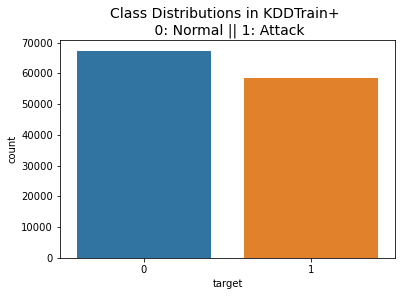

In [48]:
sb.countplot(x="target", data=traindf)
plt.title('Class Distributions in KDDTrain+ \n 0: Normal || 1: Attack', fontsize=14)
plt.show()

In [49]:
#testdf
target_test = []
for i in testdf['label']:
  if(i==0):
    target_test.append(0)
  else:
    target_test.append(1)

print(target_test)
testdf['target'] = target_test
testdf = testdf.drop(['label'],axis=1)
testdf.head()

[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 

land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0     0               0       0    0                  0          0   
1     0               0       0    0                  0          0   
2     0               0       0    0                  0          0   
3     0               0       0    0                  0          0   
4     0               0       0    0                  0          0   

   num_compromised  root_shell  su_attempted  num_root  ...  harvest  \
0                0           0             0         0  ...        0   
1                0           0             0         0  ...        0   
2                0           0             0         0  ...        0   
3                0           0             0         0  ...        0   
4                0           0             0         0  ...        0   

   http_2784  aol  http_8001  red_i  urh_i  log2_duration  log2_src_bytes  \
0          0    0          0      0      0            0.0        0.000000   
1          0    0          0      0      0            0.0        0.000000   
2          0    0          0      0      0            1.0       13.664336   
3          0    0          0      0      0            0.0        4.321928   
4          0    0          0      0      0            0.0        0.000000   

   log2_dst_bytes  target  
0        0.000000       1  
1        0.000000       1  
2        0.000000       0  
3        0.000000       1  
4        3.906891       1  

[5 rows x 123 columns]

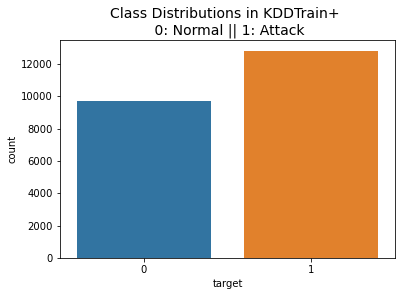

In [50]:
sb.countplot(x="target", data=testdf)
plt.title('Class Distributions in KDDTrain+ \n 0: Normal || 1: Attack', fontsize=14)
plt.show()

## Splitting into x and y

### Training Df

In [51]:
X_train = traindf.iloc[:,0:122]
Y_train = traindf['target']
print(X_train.shape)
print(Y_train.shape)

(125973, 122)
(125973,)


In [52]:
print(X_train)

        land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0          0               0       0    0                  0          0   
1          0               0       0    0                  0          0   
2          0               0       0    0                  0          0   
3          0               0       0    0                  0          1   
4          0               0       0    0                  0          1   
...      ...             ...     ...  ...                ...        ...   
125968     0               0       0    0                  0          0   
125969     0               0       0    0                  0          0   
125970     0               0       0    0                  0          1   
125971     0               0       0    0                  0          0   
125972     0               0       0    0                  0          1   

        num_compromised  root_shell  su_attempted  num_root  ...  RSTR   S0  \
0                   

In [53]:
print(Y_train)

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: target, Length: 125973, dtype: int64


In [54]:
# scaling
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scale.transform(X_train)
print(X_train_scaled)

[[-0.01408881 -0.08948642 -0.00773599 ... -0.21044482  0.99780899
  -0.86844855]
 [-0.01408881 -0.08948642 -0.00773599 ... -0.21044482  0.59286891
  -0.86844855]
 [-0.01408881 -0.08948642 -0.00773599 ... -0.21044482 -1.07104903
  -0.86844855]
 ...
 [-0.01408881 -0.08948642 -0.00773599 ... -0.21044482  1.50322092
   0.80846531]
 [-0.01408881 -0.08948642 -0.00773599 ... -0.21044482 -1.07104903
  -0.86844855]
 [-0.01408881 -0.08948642 -0.00773599 ... -0.21044482  0.60411166
  -0.86844855]]


### Testing Df

In [55]:
X_test = testdf.iloc[:,0:122]
Y_test = testdf['target']
print(X_test.shape)
print(Y_test.shape)

(22544, 122)
(22544,)


In [56]:
print(X_test)

       land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0         0               0       0    0                  0          0   
1         0               0       0    0                  0          0   
2         0               0       0    0                  0          0   
3         0               0       0    0                  0          0   
4         0               0       0    0                  0          0   
...     ...             ...     ...  ...                ...        ...   
22539     0               0       0    0                  0          1   
22540     0               0       0    0                  0          1   
22541     0               0       0    2                  0          1   
22542     0               0       0    0                  0          0   
22543     0               0       0    0                  0          0   

       num_compromised  root_shell  su_attempted  num_root  ...   SH  harvest  \
0                    0        

In [57]:
print(Y_test)

0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: target, Length: 22544, dtype: int64


In [58]:
# scaling
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scale.transform(X_test)
print(X_test_scaled)

[[-0.01762386 -0.05910394 -0.01945925 ... -0.32761542 -1.14448688
  -1.04526721]
 [-0.01762386 -0.05910394 -0.01945925 ... -0.32761542 -1.14448688
  -1.04526721]
 [-0.01762386 -0.05910394 -0.01945925 ...  0.03048835  1.83845167
  -1.04526721]
 ...
 [-0.01762386 -0.05910394 -0.01945925 ... -0.32761542  2.29048561
   1.58136336]
 [-0.01762386 -0.05910394 -0.01945925 ... -0.32761542  0.03266153
   0.04245801]
 [-0.01762386 -0.05910394 -0.01945925 ... -0.32761542 -1.14448688
  -1.04526721]]


## Ensemble learning classification models: Random forest, Multi Layer Perceptron, SVM, Naive Bayes and Decision Tree

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

mlp = MLPClassifier(solver='adam', learning_rate_init = 0.005, learning_rate = 'adaptive', activation="relu", max_iter=2000, random_state=42)
dec = DecisionTreeClassifier(criterion="entropy", max_depth=3)
ran = RandomForestClassifier(n_estimators=50)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"J48" : dec,
          "NB" : naive,
          "RF" : ran,
          "MLP" : mlp,
          "SVM" : svm
          }
scores= { }

In [60]:
#Test the models
for key, value in models.items():    
    model = value
    model.fit(X_train_scaled,Y_train)
    scores[key] = model.score(X_test_scaled, Y_test)

In [61]:
# results
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 , inplace=True)
scores_frame.head()

Accuracy Score
NB         0.527502
RF         0.741439
SVM        0.780075
J48        0.830687
MLP        0.840401

Text(0.5, 0, 'Binary Classification')

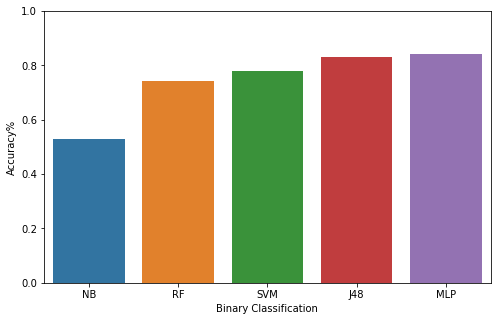

In [62]:
plt.figure(figsize=(8,5))
sb.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.ylim(0, 1)
plt.ylabel("Accuracy%")
plt.xlabel("Binary Classification")

# Building the RNN model

In [63]:
from tensorflow import keras
import numpy as np
import datetime
import time

sample = X_train_scaled.shape[0]
features = X_train_scaled.shape[1]
#Train: convert 2D to 3D for input RNN
x_train = np.reshape(X_train_scaled,(sample,features,1)) #shape  = (125973, 18, 1)
#Test: convert 2D to 3D for input RNN

x_test = testdf.values
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [64]:
print(x_train.shape)

(125973, 122, 1)


In [65]:
print(Y_train.shape)

(125973,)


### Metrics list to evaluate the model

In [66]:
import tensorflow as tf
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

### Custom Callback functions: recall, precision, f1_score

In [67]:
import tensorflow.keras.backend as K
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec+K.epsilon()))

## RNN model 1: hidden node = 60, learning rate = 0.01

In [68]:
from keras import optimizers 
model = Sequential()
model.add(SimpleRNN(60,input_shape=(features,x_train.shape[2]), activation='sigmoid'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60)                3720      
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


### training model 1

In [69]:
mcp = ModelCheckpoint('RNN_binary2.h5')

In [70]:
history = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 32,callbacks=[mcp])  

Epoch 1/15
2638/2638 [==============================] - 93s 34ms/step - loss: 0.0656 - accuracy: 0.9164 - mae: 0.1494 - recall: 0.4781 - precision: 0.9970 - f1_score: 0.6411 - val_loss: 0.0571 - val_accuracy: 0.9268 - val_mae: 0.1475 - val_recall: 0.4688 - val_precision: 1.0000 - val_f1_score: 0.6332
Epoch 2/15
2638/2638 [==============================] - 86s 33ms/step - loss: 0.0462 - accuracy: 0.9480 - mae: 0.1130 - recall: 0.4931 - precision: 1.0000 - f1_score: 0.6556 - val_loss: 0.0417 - val_accuracy: 0.9571 - val_mae: 0.1040 - val_recall: 0.4852 - val_precision: 1.0000 - val_f1_score: 0.6483
Epoch 3/15
2638/2638 [==============================] - 83s 31ms/step - loss: 0.0439 - accuracy: 0.9529 - mae: 0.1040 - recall: 0.4911 - precision: 1.0000 - f1_score: 0.6537 - val_loss: 0.0450 - val_accuracy: 0.9468 - val_mae: 0.1037 - val_recall: 0.5009 - val_precision: 1.0000 - val_f1_score: 0.6627
Epoch 4/15
2638/2638 [==============================] - 82s 31ms/step - loss: 0.0397 - accurac

## RNN model 2: hidden node = 80, learning rate = 0.01

In [71]:
from keras import optimizers 
model = Sequential()
model.add(SimpleRNN(80,input_shape=(features,x_train.shape[2]), activation='sigmoid'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 80)                6560      
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [72]:
mcp = ModelCheckpoint('RNN_binary.h5')

### training model 2

In [73]:
history2 = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 32,callbacks=[mcp]) 

Epoch 1/15
2638/2638 [==============================] - 94s 35ms/step - loss: 0.0659 - accuracy: 0.9177 - mae: 0.1505 - recall: 0.4797 - precision: 0.9970 - f1_score: 0.6421 - val_loss: 0.0556 - val_accuracy: 0.9437 - val_mae: 0.1729 - val_recall: 0.4899 - val_precision: 1.0000 - val_f1_score: 0.6525
Epoch 2/15
2638/2638 [==============================] - 92s 35ms/step - loss: 0.0498 - accuracy: 0.9377 - mae: 0.1266 - recall: 0.4811 - precision: 1.0000 - f1_score: 0.6443 - val_loss: 0.0494 - val_accuracy: 0.9418 - val_mae: 0.1136 - val_recall: 0.4876 - val_precision: 1.0000 - val_f1_score: 0.6505
Epoch 3/15
2638/2638 [==============================] - 92s 35ms/step - loss: 0.0458 - accuracy: 0.9416 - mae: 0.1099 - recall: 0.4927 - precision: 1.0000 - f1_score: 0.6554 - val_loss: 0.0435 - val_accuracy: 0.9417 - val_mae: 0.0989 - val_recall: 0.5020 - val_precision: 1.0000 - val_f1_score: 0.6635
Epoch 4/15
2638/2638 [==============================] - 92s 35ms/step - loss: 0.0447 - accurac

## RNN model 3: hidden node = 120, learning rate = 0.01

In [74]:
from keras import optimizers 
model = Sequential()
model.add(SimpleRNN(120,input_shape=(features,x_train.shape[2]), activation='sigmoid'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 120)               14640     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 14,761
Trainable params: 14,761
Non-trainable params: 0
_________________________________________________________________


In [75]:
mcp = ModelCheckpoint('RNN_binary3.h5')

### training model 3

In [76]:
history3 = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 32,callbacks=[mcp]) 

Epoch 1/15
2638/2638 [==============================] - 123s 46ms/step - loss: 0.0666 - accuracy: 0.9182 - mae: 0.1526 - recall: 0.4785 - precision: 0.9977 - f1_score: 0.6409 - val_loss: 0.0574 - val_accuracy: 0.9388 - val_mae: 0.1717 - val_recall: 0.5032 - val_precision: 1.0000 - val_f1_score: 0.6646
Epoch 2/15
2638/2638 [==============================] - 1111s 421ms/step - loss: 0.0467 - accuracy: 0.9409 - mae: 0.1189 - recall: 0.4855 - precision: 1.0000 - f1_score: 0.6486 - val_loss: 0.0494 - val_accuracy: 0.9482 - val_mae: 0.1017 - val_recall: 0.4974 - val_precision: 1.0000 - val_f1_score: 0.6593
Epoch 3/15
2638/2638 [==============================] - 120s 45ms/step - loss: 0.0338 - accuracy: 0.9565 - mae: 0.0916 - recall: 0.4779 - precision: 1.0000 - f1_score: 0.6416 - val_loss: 0.0280 - val_accuracy: 0.9618 - val_mae: 0.0684 - val_recall: 0.4903 - val_precision: 1.0000 - val_f1_score: 0.6530
Epoch 4/15
2638/2638 [==============================] - 119s 45ms/step - loss: 0.0289 - a

## comparing models for learning rate 0.01

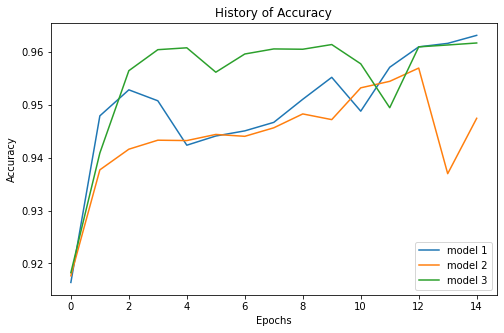

In [77]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
ax1.set_title('History of Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['model 1', 'model 2','model 3'])

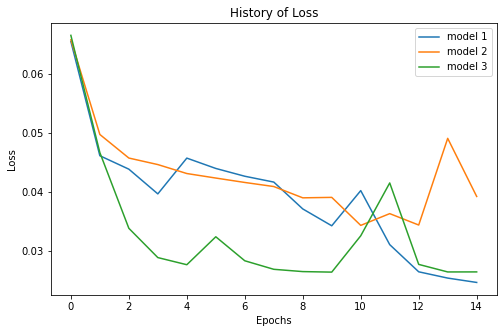

In [78]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
ax1.set_title('History of Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['model 1', 'model 2','model 3'])

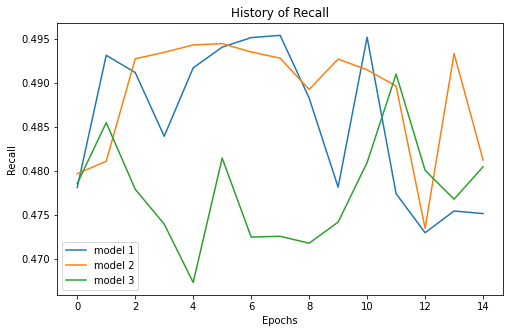

In [79]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['recall'])
plt.plot(history2.history['recall'])
plt.plot(history3.history['recall'])
ax1.set_title('History of Recall')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Recall')
ax1.legend(['model 1', 'model 2','model 3'])

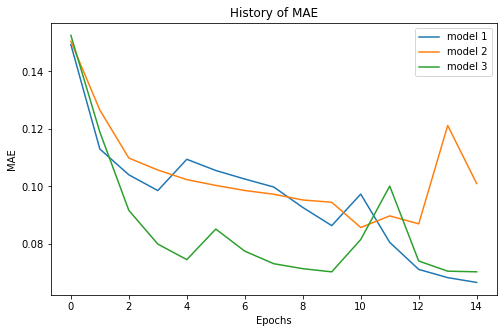

In [80]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['mae'])
plt.plot(history2.history['mae'])
plt.plot(history3.history['mae'])
ax1.set_title('History of MAE')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(['model 1', 'model 2','model 3'])

## RNN model 4: hidden node = 60, learning rate = 0.1

In [81]:
from keras import optimizers 
model = Sequential()
model.add(SimpleRNN(60,input_shape=(features,x_train.shape[2]), activation='sigmoid'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 60)                3720      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [82]:
mcp = ModelCheckpoint('RNN_binary4.h5')

In [83]:
history = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 32,callbacks=[mcp]) 

Epoch 1/15
2638/2638 [==============================] - 90s 33ms/step - loss: 0.0844 - accuracy: 0.9218 - mae: 0.1438 - recall: 0.4695 - precision: 0.9958 - f1_score: 0.6322 - val_loss: 0.0493 - val_accuracy: 0.9255 - val_mae: 0.1055 - val_recall: 0.4484 - val_precision: 1.0000 - val_f1_score: 0.6138
Epoch 2/15
2638/2638 [==============================] - 88s 34ms/step - loss: 0.0556 - accuracy: 0.9347 - mae: 0.1314 - recall: 0.4913 - precision: 1.0000 - f1_score: 0.6539 - val_loss: 0.0571 - val_accuracy: 0.9235 - val_mae: 0.1330 - val_recall: 0.4489 - val_precision: 1.0000 - val_f1_score: 0.6144
Epoch 3/15
2638/2638 [==============================] - 90s 34ms/step - loss: 0.0534 - accuracy: 0.9406 - mae: 0.1229 - recall: 0.4970 - precision: 1.0000 - f1_score: 0.6592 - val_loss: 0.0519 - val_accuracy: 0.9405 - val_mae: 0.1343 - val_recall: 0.5090 - val_precision: 1.0000 - val_f1_score: 0.6698
Epoch 4/15
2638/2638 [==============================] - 91s 34ms/step - loss: 0.0537 - accurac

## RNN model 5: hidden node = 80, learning rate = 0.1

In [84]:
from keras import optimizers 
model = Sequential()
model.add(SimpleRNN(80,input_shape=(features,x_train.shape[2]), activation='sigmoid'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 80)                6560      
                                                                 
 dense_4 (Dense)             (None, 1)                 81        
                                                                 
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [85]:
mcp = ModelCheckpoint('RNN_binary5.h5')

In [86]:
history2 = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 32,callbacks=[mcp]) 

Epoch 1/15
2638/2638 [==============================] - 102s 38ms/step - loss: 0.0939 - accuracy: 0.9253 - mae: 0.1388 - recall: 0.4895 - precision: 0.9958 - f1_score: 0.6505 - val_loss: 0.0516 - val_accuracy: 0.9370 - val_mae: 0.1198 - val_recall: 0.5029 - val_precision: 1.0000 - val_f1_score: 0.6642
Epoch 2/15
2638/2638 [==============================] - 106s 40ms/step - loss: 0.0761 - accuracy: 0.9180 - mae: 0.1689 - recall: 0.4795 - precision: 0.9966 - f1_score: 0.6417 - val_loss: 0.0656 - val_accuracy: 0.8927 - val_mae: 0.1069 - val_recall: 0.5106 - val_precision: 1.0000 - val_f1_score: 0.6712
Epoch 3/15
2638/2638 [==============================] - 106s 40ms/step - loss: 0.0811 - accuracy: 0.9133 - mae: 0.1808 - recall: 0.4721 - precision: 0.9970 - f1_score: 0.6345 - val_loss: 0.0638 - val_accuracy: 0.9207 - val_mae: 0.1361 - val_recall: 0.4458 - val_precision: 1.0000 - val_f1_score: 0.6113
Epoch 4/15
2638/2638 [==============================] - 107s 41ms/step - loss: 0.0782 - acc

## RNN model 6: hidden node = 120, learning rate = 0.1

In [87]:
from keras import optimizers 
model = Sequential()
model.add(SimpleRNN(120,input_shape=(features,x_train.shape[2]), activation='sigmoid'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 120)               14640     
                                                                 
 dense_5 (Dense)             (None, 1)                 121       
                                                                 
Total params: 14,761
Trainable params: 14,761
Non-trainable params: 0
_________________________________________________________________


In [88]:
mcp = ModelCheckpoint('RNN_binary5.h5')

In [89]:
history3 = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 32,callbacks=[mcp]) 

Epoch 1/15
2638/2638 [==============================] - 140s 52ms/step - loss: 0.1701 - accuracy: 0.9170 - mae: 0.1608 - recall: 0.4756 - precision: 0.9955 - f1_score: 0.6378 - val_loss: 0.0562 - val_accuracy: 0.9234 - val_mae: 0.1361 - val_recall: 0.4498 - val_precision: 1.0000 - val_f1_score: 0.6152
Epoch 2/15
2638/2638 [==============================] - 137s 52ms/step - loss: 0.0652 - accuracy: 0.9217 - mae: 0.1552 - recall: 0.4831 - precision: 1.0000 - f1_score: 0.6458 - val_loss: 0.0607 - val_accuracy: 0.9264 - val_mae: 0.1509 - val_recall: 0.4565 - val_precision: 1.0000 - val_f1_score: 0.6216
Epoch 3/15
2638/2638 [==============================] - 137s 52ms/step - loss: 0.0662 - accuracy: 0.9252 - mae: 0.1538 - recall: 0.4857 - precision: 1.0000 - f1_score: 0.6484 - val_loss: 0.0551 - val_accuracy: 0.9146 - val_mae: 0.1113 - val_recall: 0.4450 - val_precision: 1.0000 - val_f1_score: 0.6106
Epoch 4/15
2638/2638 [==============================] - 138s 52ms/step - loss: 0.0627 - acc

## comparing models for learning rate 0.1

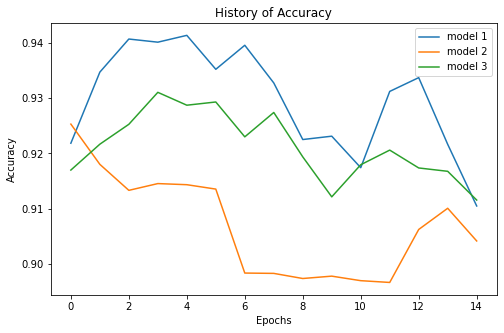

In [90]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
ax1.set_title('History of Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['model 1', 'model 2','model 3'])

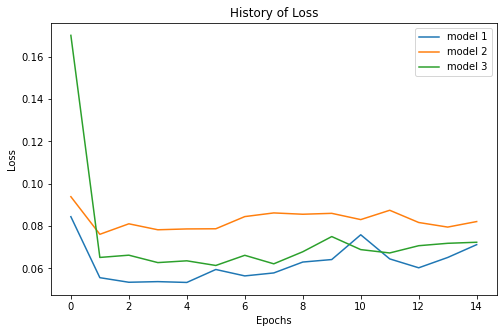

In [91]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
ax1.set_title('History of Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['model 1', 'model 2','model 3'])

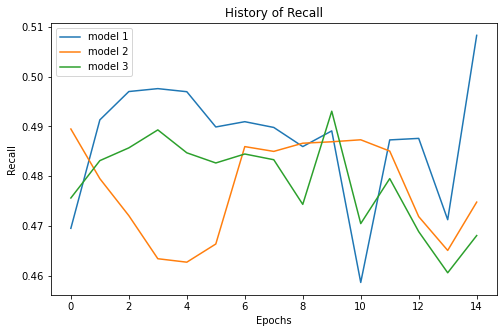

In [92]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['recall'])
plt.plot(history2.history['recall'])
plt.plot(history3.history['recall'])
ax1.set_title('History of Recall')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Recall')
ax1.legend(['model 1', 'model 2','model 3'])

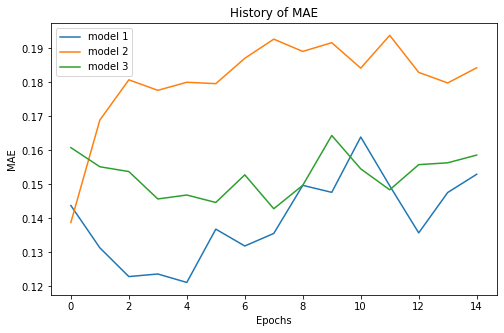

In [93]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(history.history['mae'])
plt.plot(history2.history['mae'])
plt.plot(history3.history['mae'])
ax1.set_title('History of MAE')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(['model 1', 'model 2','model 3'])

## Enhancement - LSTM Model

In [94]:
#Using tanh and sigmoid as activation functions in LSTM

Model = keras.Sequential([

        keras.layers.LSTM(80,input_shape=(features,x_train.shape[2]),activation='tanh',recurrent_activation='sigmoid'),
        keras.layers.Dense(1,activation="tanh")
    ])

Model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

#Training the model
hist = Model.fit(x_train, Y_train, epochs=25, batch_size= 128) 
Model.summary()

Epoch 1/25
985/985 [==============================] - 240s 237ms/step - loss: 0.0534 - accuracy: 0.9387
Epoch 2/25
985/985 [==============================] - 221s 225ms/step - loss: 0.0225 - accuracy: 0.9718
Epoch 3/25
985/985 [==============================] - 224s 227ms/step - loss: 0.0195 - accuracy: 0.9797
Epoch 4/25
985/985 [==============================] - 223s 227ms/step - loss: 0.0145 - accuracy: 0.9853
Epoch 5/25
985/985 [==============================] - 219s 222ms/step - loss: 0.0272 - accuracy: 0.9672
Epoch 6/25
985/985 [==============================] - 218s 221ms/step - loss: 0.0243 - accuracy: 0.9722
Epoch 7/25
985/985 [==============================] - 220s 223ms/step - loss: 0.0159 - accuracy: 0.9829
Epoch 8/25
985/985 [==============================] - 220s 223ms/step - loss: 0.0112 - accuracy: 0.9881
Epoch 9/25
985/985 [==============================] - 222s 225ms/step - loss: 0.0101 - accuracy: 0.9893
Epoch 10/25
985/985 [==============================] - 219s 223m

## RNN Model with tanh activation function

In [95]:
#Using tanh and sigmoid as activation functions
model = Sequential()
model.add(SimpleRNN(80,input_shape=(features,x_train.shape[2]), activation='tanh'))
model.add(Dense(60, input_dim=122, activation='relu'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 80)                6560      
                                                                 
 dense_7 (Dense)             (None, 60)                4860      
                                                                 
 dense_8 (Dense)             (None, 1)                 61        
                                                                 
Total params: 11,481
Trainable params: 11,481
Non-trainable params: 0
_________________________________________________________________


In [96]:
mcp = ModelCheckpoint('LSTM_model.h5')

In [97]:
history_lstm = model.fit(x_train, Y_train, validation_split=0.33, epochs=15, batch_size= 64 ,callbacks=[mcp]) 

Epoch 1/15
1319/1319 [==============================] - 73s 51ms/step - loss: 663.1029 - accuracy: 0.5360 - mae: 2.4175 - recall: 0.3179 - precision: 0.3723 - f1_score: 0.3297 - val_loss: 0.1546 - val_accuracy: 0.8980 - val_mae: 0.3532 - val_recall: 0.5406 - val_precision: 1.0000 - val_f1_score: 0.6996
Epoch 2/15
1319/1319 [==============================] - 64s 48ms/step - loss: 0.4683 - accuracy: 0.5213 - mae: 0.5623 - recall: 0.4756 - precision: 0.5421 - f1_score: 0.4851 - val_loss: 0.8608 - val_accuracy: 0.5365 - val_mae: 0.7756 - val_recall: 0.0016 - val_precision: 0.0954 - val_f1_score: 0.0031
Epoch 3/15
1319/1319 [==============================] - 64s 49ms/step - loss: 6.4330 - accuracy: 0.5014 - mae: 0.6640 - recall: 0.4860 - precision: 0.5406 - f1_score: 0.4869 - val_loss: 0.3229 - val_accuracy: 0.5367 - val_mae: 0.4834 - val_recall: 0.0013 - val_precision: 0.0769 - val_f1_score: 0.0025
Epoch 4/15
1319/1319 [==============================] - 62s 47ms/step - loss: 7.4002 - accur

## Using LSTM model with tanh activation function

In [98]:
#Using tanh and sigmoid as activation functions
from keras.layers import Dropout
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(80,input_shape=(features,x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(80))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 122, 80)           26240     
                                                                 
 dropout (Dropout)           (None, 122, 80)           0         
                                                                 
 lstm_2 (LSTM)               (None, 80)                51520     
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 81        
                                                                 
Total params: 77,841
Trainable params: 77,841
Non-trainable params: 0
_________________________________________________________________


In [99]:
mcp2 = ModelCheckpoint('new_model.h5')

In [100]:
x_test = testdf.drop(columns='target').values
print(x_test.shape)

(22544, 122)


In [101]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [102]:
y_test = testdf.target
print(y_test)

0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: target, Length: 22544, dtype: int64


In [103]:
# Final evaluation of the model
scores = Model.evaluate(x_test, Y_test, verbose=0)
print("/n")
print("Accuracy: %.2f%%" % (scores[1]*100))

/n
Accuracy: 47.23%


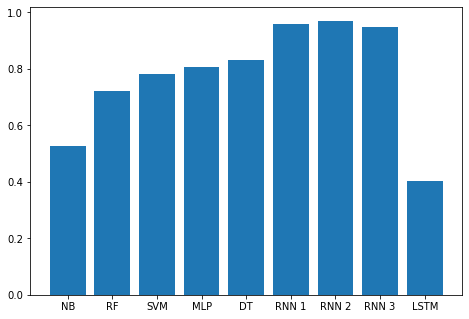

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['NB', 'RF', 'SVM', 'MLP', 'DT','RNN 1','RNN 2','RNN 3','LSTM']
accu = [0.527,0.722,0.78,0.805,0.8306,0.9593,0.9710,0.9475,0.4021]
ax.bar(models,accu)
plt.show()